In [1]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade scipy networkx

  Using cached networkx-2.8.8-py3-none-any.whl (2.0 MB)
  Attempting uninstall: networkx
    Found existing installation: networkx 2.7.1
    Uninstalling networkx-2.7.1:
      Successfully uninstalled networkx-2.7.1
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow

In [4]:
pip install -q contractions==0.0.48

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np  
import pandas as pd 
import re    
import nltk
from bs4 import BeautifulSoup 
from contractions import contractions_dict
from nltk.corpus import stopwords   

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

In [9]:
data=pd.read_csv("data/CNNtest.csv")

In [10]:
data.head()

,id,article,highlights
0,92c514c913c0bdfe25341af9fd72b29db544099b,"Ever noticed how plane seats appear to be getting smaller and smaller? With increasing numbers of people taking to the skies, some experts are questioning if having such packed out planes is putti...",Experts question if packed out planes are putting passengers at risk .\nU.S consumer advisory group says minimum space must be stipulated .\nSafety tests conducted on planes with more leg room th...
1,2003841c7dc0e7c5b1a248f9cd536d727f27a45a,"A drunk teenage boy had to be rescued by security after jumping into a lions' enclosure at a zoo in western India. Rahul Kumar, 17, clambered over the enclosure fence at the Kamla Nehru Zoological...","Drunk teenage boy climbed into lion enclosure at zoo in west India .\nRahul Kumar, 17, ran towards animals shouting 'Today I kill a lion!'\nFortunately he fell into a moat before reaching lions an..."
2,91b7d2311527f5c2b63a65ca98d21d9c92485149,Dougie Freedman is on the verge of agreeing a new two-year deal to remain at Nottingham Forest. Freedman has stabilised Forest since he replaced cult hero Stuart Pearce and the club's owners are p...,Nottingham Forest are close to extending Dougie Freedman's contract .\nThe Forest boss took over from former manager Stuart Pearce in February .\nFreedman has since lead the club to ninth in the C...
3,caabf9cbdf96eb1410295a673e953d304391bfbb,"Liverpool target Neto is also wanted by PSG and clubs in Spain as Brendan Rodgers faces stiff competition to land the Fiorentina goalkeeper, according to the Brazilian's agent Stefano Castagna. Th...","Fiorentina goalkeeper Neto has been linked with Liverpool and Arsenal .\nNeto joined Firoentina from Brazilian outfit Atletico Paranaense in 2011 .\nHe is also wanted by PSG and Spanish clubs, acc..."
4,3da746a7d9afcaa659088c8366ef6347fe6b53ea,"Bruce Jenner will break his silence in a two-hour interview with Diane Sawyer later this month. The former Olympian and reality TV star, 65, will speak in a 'far-ranging' interview with Sawyer for...","Tell-all interview with the reality TV star, 69, will air on Friday April 24 .\nIt comes amid continuing speculation about his transition to a woman and following his involvement in a deadly car c..."


In [11]:
len(data)

11490

In [12]:
data.drop_duplicates(subset=['article'],inplace=True)  #dropping duplicates
len(data)

11488

In [13]:
data.dropna(axis=0,inplace = True)
len(data)

11488

In [14]:
for key, value in list(contractions_dict.items())[:10]: 
    print(f'{key} == {value}')

I'm == I am
I'm'a == I am about to
I'm'o == I am going to
I've == I have
I'll == I will
I'll've == I will have
I'd == I would
I'd've == I would have
Whatcha == What are you
amn't == am not


In [15]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
#Note: I did not lemmatize the words as we are not interested to group words into their root form  

def text_cleaner(text):
    newString = text.lower()
    newString = BeautifulSoup(newString, "lxml").text     #remove HTML tags"
    newString = re.sub(r'\([^)]*\)', '', newString)       #remove punctuation  
    newString = re.sub('"','', newString)                 #remove punctuation  
    
    #convert to long form 
    newString = ' '.join([contractions_dict[t] if t in contractions_dict else t for t in newString.split(" ")])    
    
    newString = re.sub(r"'s\b","",newString)              #remove 's 
    newString = re.sub("[^a-zA-Z]", " ", newString)       #remove special characters 
    
    tokens = [w for w in newString.split() if not w in stop_words]      #only tokenize non-stop words 
    
    long_words=[]
    for i in tokens:
        if len(i)>=3:                                     #removing short word
            long_words.append(i)   
    return (" ".join(long_words)).strip()

cleaned_text = []
for t in data['article']:
    cleaned_text.append(text_cleaner(t))
 
cleaned_text

['ever noticed plane seats appear getting smaller smaller increasing numbers people taking skies experts questioning packed planes putting passengers risk say shrinking space aeroplanes uncomfortable putting health safety danger squabbling arm rest shrinking space planes putting health safety danger week consumer advisory group set department transportation said public hearing government happy set standards animals flying planes stipulate minimum amount space humans world animals rights space food humans said charlie leocha consumer representative committee time dot faa take stand humane treatment passengers could crowding planes lead serious issues fighting space overhead lockers crashing elbows seat back kicking tests conducted faa use planes inch pitch standard airlines decreased many economy seats united airlines inches room airlines offer little inches cynthia corbertt human factors researcher federal aviation administration conducts tests quickly passengers leave plane tests cond

In [17]:
data['cleaned_text']=cleaned_text
data.dropna(axis=0,inplace=True)

len(data)

11488

In [18]:
for i in range(5):
    print("article:",data['cleaned_text'][i])
    print("\n")

article: ever noticed plane seats appear getting smaller smaller increasing numbers people taking skies experts questioning packed planes putting passengers risk say shrinking space aeroplanes uncomfortable putting health safety danger squabbling arm rest shrinking space planes putting health safety danger week consumer advisory group set department transportation said public hearing government happy set standards animals flying planes stipulate minimum amount space humans world animals rights space food humans said charlie leocha consumer representative committee time dot faa take stand humane treatment passengers could crowding planes lead serious issues fighting space overhead lockers crashing elbows seat back kicking tests conducted faa use planes inch pitch standard airlines decreased many economy seats united airlines inches room airlines offer little inches cynthia corbertt human factors researcher federal aviation administration conducts tests quickly passengers leave plane tes

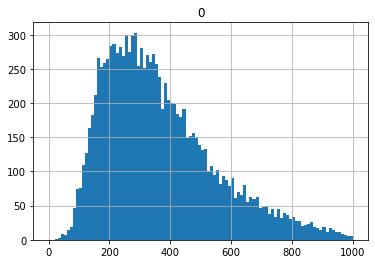

In [21]:
import matplotlib.pyplot as plt
text_word_count = []
summary_word_count = []

for i in data['cleaned_text']:
      text_word_count.append(len(i.split()))

length_df = pd.DataFrame(text_word_count)
length_df.hist(bins = 100,range=[0, 1000])
plt.show()

In [22]:
max_len_text=800 

In [23]:
#vectorize data and pad zeros to max length  

X = data['cleaned_text']


X_tokenizer = Tokenizer()
X_tokenizer.fit_on_texts(list(X))
X_vector =  X_tokenizer.texts_to_sequences(X)  
X_vector = pad_sequences(X_vector, maxlen=max_len_text, padding='post') 

In [24]:
print(X_vector.shape)

(11488, 800)


In [25]:
X_vector[0]

array([  225,  2104,   721,  1600,   756,   303,  2366,  2366,  2262,
        1567,     9,   187,  6059,   854,  4616,  2783,  3010,  1120,
         924,   568,    62, 11903,   559, 34572,  4665,  1120,   251,
         634,  1964, 42602,  1686,   715, 11903,   559,  3010,  1120,
         251,   634,  1964,    48,  4637, 12347,   128,    99,   370,
        5208,     1,   163,   697,   157,   403,    99,  2298,   947,
        1323,  3010, 49223,  3155,   920,   559,  1992,    25,   947,
         655,   559,   293,  1992,     1,  1691, 61049,  4637,  3470,
        2213,     8, 11904, 12348,    45,   563, 13058,   493,   924,
          13, 22743,  3010,   297,   643,   934,   895,   559,  7512,
       18233,  4771, 17199,  1198,    17,  4276,  1335,  2729, 12348,
         149,  3010,  3755,  1013,  1946,  2473, 15490,    44,  1590,
        1600,    59,  2473,  3511,   315,  2473,   765,   141,  3511,
        7582, 61050,   479,  3813,  5209,   839,  4043,  1951, 17200,
        1335,   731,

In [26]:
X_voc_size  =   len(X_tokenizer.word_index) +1 
print (f'There are {X_voc_size} different words in the main text')

There are 86527 different words in the main text


TextRank is an extractive and unsupervised text summarization technique
1 - Concatenate all the text contained in the articles
2 - Split the text into individual sentences
3 - Find vector representation (word embeddings) for each and every sentence
4 - Similarities between sentence vectors are then calculated and stored in a matrix
5 - The similarity matrix is then converted into a graph, with sentences as vertices and similarity scores as edges, for sentence rank calculation
6 - A certain number of top-ranked sentences form the final summary

Note:  Train, test, split may not be meaningful for unsupervised algo 

In [27]:
#reduced the amount of data in order to run the programme 
X_vector_reduced = X_vector[:200]
len(X_vector_reduced)

200

In [ ]:
word_frequencies = {}
for word in nltk.word_tokenize(formatted_article_text):
    if word not in stopwords:
        if word not in word_frequencies.keys():
            word_frequencies[word] = 1
        else:
            word_frequencies[word] += 1